In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [2]:
df = pd.read_csv("crop_recommendation_outlierless.csv")
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
len(set(y))

20

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
xtc = ExtraTreesClassifier(random_state=42)
hyperparameters = {
    "n_estimators": [x for x in range(1, 20)],
    "max_depth": [x for x in range(1, 15)],
    "criterion": ["gini", "entropy", "log_loss"]
}

cv = GridSearchCV(estimator=xtc, param_grid=hyperparameters, cv=5, scoring="accuracy", n_jobs=-1)
cv.fit(x_train, y_train)
print("Best hyperparameters: ", cv.best_params_)


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 17}


In [6]:
best_model = cv.best_estimator_
y_pred = best_model.predict(x_test)
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
prec = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
print("\n" + "="*50 + "\n")
print(f"Accuracy: {acc_score:.4f}")
print(f"Macro f1: {f1: .4f}")
print(f"Precision: {prec: .4f}")
print(f"Recall: {recall: .4f}")
print("\n" + "="*50 + "\n")



Accuracy: 0.9892
Macro f1:  0.9868
Precision:  0.9890
Recall:  0.9865




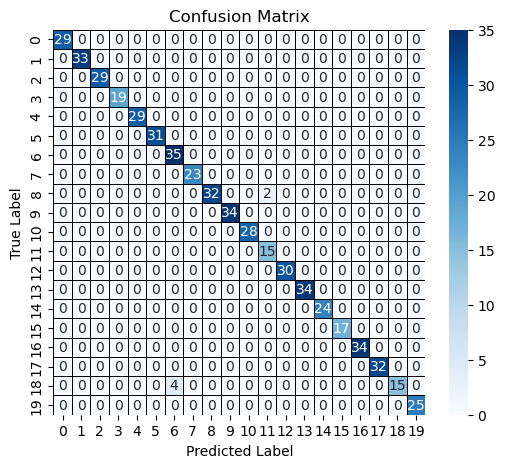

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()